In [72]:
import pandas as pd

# Load the preprocessed dataset
train_df = pd.read_csv(r"E:\Study Data MS Data Scince\ML(Machine Learning)\Exercise 3\Machine_Learning-main\Datasets\KDD_train.csv")
test_df = pd.read_csv(r"E:\Study Data MS Data Scince\ML(Machine Learning)\Exercise 3\Machine_Learning-main\Datasets\KDD_test.csv")

# Display first few rows
print("Training Data:")
display(train_df.head())

print("Testing Data:")
display(test_df.head())

# Check dataset info
print("\nDataset Information:")
train_df.info()


Training Data:


,age,class_of_worker,industry_code,occup_code,marital_stat,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,73,Not in universe,0,0,Widowed,White,All other,Female,Not in labor force,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,0,0,-50000,High school graduate
1,48,Private,40,10,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,2,Not in universe,2,52,1200,-50000,Some college but no degree
2,42,Private,34,3,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,5178,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
3,47,Local government,43,26,Married-civilian spouse present,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,876,-50000,Some college but no degree
4,34,Private,4,37,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree


Testing Data:


,age,class_of_worker,industry_code,occup_code,marital_stat,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,58,Self-employed-not incorporated,4,34,Divorced,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree
1,28,Private,4,40,Never married,White,All other,Female,Unemployed full-time,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,30,0,-50000,High school graduate
2,46,Private,37,31,Divorced,White,Central or South American,Female,Children or Armed Forces,0,...,Not in universe,Columbia,Foreign born- Not a citizen of U S,0,Not in universe,2,52,0,-50000,High school graduate
3,47,Private,39,36,Never married,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
4,39,Not in universe,0,0,Married-civilian spouse present,White,Mexican (Mexicano),Female,Children or Armed Forces,0,...,Not in universe,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,0,0,-50000,10th grade



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108497 entries, 0 to 108496
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   age                       108497 non-null  int64 
 1   class_of_worker           108497 non-null  object
 2   industry_code             108497 non-null  int64 
 3   occup_code                108497 non-null  int64 
 4   marital_stat              108497 non-null  object
 5   race                      108497 non-null  object
 6   hispanic                  108497 non-null  object
 7   sex                       108497 non-null  object
 8   full_or_part_time         108497 non-null  object
 9   cap_gain                  108497 non-null  int64 
 10  cap_loss                  108497 non-null  int64 
 11  dividends                 108497 non-null  int64 
 12  filing_stat               108497 non-null  object
 13  household_summary         108497 non-

In [73]:
# Select Quasi-Identifiers (QIs)
quasi_identifiers = ["age", "race", "sex", "birth_country_mother", "occup_code"]

# Display QIs
print("\nSelected Quasi-Identifiers (QIs):", quasi_identifiers)
display(train_df[quasi_identifiers].head())



Selected Quasi-Identifiers (QIs): ['age', 'race', 'sex', 'birth_country_mother', 'occup_code']


,age,race,sex,birth_country_mother,occup_code
0,73,White,Female,United-States,0
1,48,Amer Indian Aleut or Eskimo,Female,United-States,10
2,42,White,Male,United-States,3
3,47,White,Female,United-States,26
4,34,White,Male,United-States,37


In [74]:
# Apply Age Generalization (Grouping into bins)
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ["0-18", "19-30", "31-45", "46-60", "60+"]
train_df["age"] = pd.cut(train_df["age"], bins=age_bins, labels=age_labels)
test_df["age"] = pd.cut(test_df["age"], bins=age_bins, labels=age_labels)

# Apply Race Generalization (Grouping Races into Broader Categories)
race_mapping = {
    "White": "Group A",
    "Black": "Group B",
    "Asian or Pacific Islander": "Group C",
    "Amer Indian Aleut or Eskimo": "Group C",
    "Other": "Group D"
}
train_df["race"] = train_df["race"].replace(race_mapping)
test_df["race"] = test_df["race"].replace(race_mapping)

# Apply Sex Generalization (Replace M/F with Non-Specific Labels)
train_df["sex"] = train_df["sex"].replace({"Male": "Person", "Female": "Person"})
test_df["sex"] = test_df["sex"].replace({"Male": "Person", "Female": "Person"})

# Apply Birth Country Generalization (Grouping by Continent)
continent_mapping = {
    "United-States": "North America",
    "Canada": "North America",
    "Mexico": "Latin America",
    "Germany": "Europe",
    "France": "Europe",
    "China": "Asia",
    "India": "Asia",
    "Philippines": "Asia",
    "South": "Unknown",
    "?": "Unknown"
}
train_df["birth_country_mother"] = train_df["birth_country_mother"].replace(continent_mapping)
test_df["birth_country_mother"] = test_df["birth_country_mother"].replace(continent_mapping)

# Apply Occupation Code Generalization (Grouping Job Codes into Categories)
occupation_mapping = {
    range(1, 200): "Tech",
    range(200, 400): "Manual",
    range(400, 600): "Service",
    range(600, 800): "Business",
    range(800, 1000): "Management",
    range(1000, 1200): "Factory",
    range(1200, 1400): "Admin",
    range(1400, 1600): "Agriculture",
    range(1600, 1800): "Transport",
    range(1800, 2000): "Security",
}
train_df["occup_code"] = train_df["occup_code"].apply(lambda x: next((v for k, v in occupation_mapping.items() if x in k), "Other"))
test_df["occup_code"] = test_df["occup_code"].apply(lambda x: next((v for k, v in occupation_mapping.items() if x in k), "Other"))

# Display transformed dataset
print("Transformed Training Data:")
display(train_df.head())


Transformed Training Data:


,age,class_of_worker,industry_code,occup_code,marital_stat,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,60+,Not in universe,0,Other,Widowed,White,All other,Female,Not in labor force,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,0,0,-50000,High school graduate
1,46-60,Private,40,Tech,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,2,Not in universe,2,52,1200,-50000,Some college but no degree
2,31-45,Private,34,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,5178,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
3,46-60,Local government,43,Tech,Married-civilian spouse present,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,876,-50000,Some college but no degree
4,31-45,Private,4,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree


In [75]:
# Save the transformed datasets
train_df.to_csv("KDD_train_local_transformed.csv", index=False)
test_df.to_csv("KDD_test_local_transformed.csv", index=False)

print("Local Transformation applied and files saved successfully!")

Local Transformation applied and files saved successfully!


In [76]:
## Step 2: Testing Transformed Dataset with KNN Classifier

In [77]:
import pandas as pd

# Load the transformed datasets directly
train_df = pd.read_csv("KDD_train_local_transformed.csv")
test_df = pd.read_csv("KDD_test_local_transformed.csv")

# Display first few rows
print("Training Data:")
display(train_df.head())

print("Testing Data:")
display(test_df.head())


Training Data:


,age,class_of_worker,industry_code,occup_code,marital_stat,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,60+,Not in universe,0,Other,Widowed,White,All other,Female,Not in labor force,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,0,0,-50000,High school graduate
1,46-60,Private,40,Tech,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,2,Not in universe,2,52,1200,-50000,Some college but no degree
2,31-45,Private,34,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,5178,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
3,46-60,Local government,43,Tech,Married-civilian spouse present,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,876,-50000,Some college but no degree
4,31-45,Private,4,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree


Testing Data:


,age,class_of_worker,industry_code,occup_code,marital_stat,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,46-60,Self-employed-not incorporated,4,Tech,Divorced,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree
1,19-30,Private,4,Tech,Never married,White,All other,Female,Unemployed full-time,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,30,0,-50000,High school graduate
2,46-60,Private,37,Tech,Divorced,White,Central or South American,Female,Children or Armed Forces,0,...,Not in universe,Columbia,Foreign born- Not a citizen of U S,0,Not in universe,2,52,0,-50000,High school graduate
3,46-60,Private,39,Tech,Never married,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
4,31-45,Not in universe,0,Other,Married-civilian spouse present,White,Mexican (Mexicano),Female,Children or Armed Forces,0,...,Not in universe,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,0,0,-50000,10th grade


In [78]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_df.isnull().sum())

# Check data types
print("\nData Types:")
print(train_df.dtypes)



Missing Values in Training Data:
age                         0
class_of_worker             0
industry_code               0
occup_code                  0
marital_stat                0
race                        0
hispanic                    0
sex                         0
full_or_part_time           0
cap_gain                    0
cap_loss                    0
dividends                   0
filing_stat                 0
household_summary           0
live_in_house_1_year_ago    0
num_persons_worked          0
fam_members_under18         0
birth_country_mother        0
citizenship                 0
own_business                0
questionnaire               0
vet_benefits                0
weeks_per_year              0
wage_per_hour               0
income                      0
education                   0
dtype: int64

Missing Values in Testing Data:
age                            0
class_of_worker                0
industry_code                  0
occup_code                     0
marital_

In [79]:
# Fill missing values (if any)
train_df = train_df.fillna(train_df.median(numeric_only=True))
test_df = test_df.fillna(test_df.median(numeric_only=True))


In [80]:
# Define features and target variable
X_train = train_df.drop(columns=["income"])  # Drop target column
y_train = train_df["income"]

X_test = test_df.drop(columns=["income"])
y_test = test_df["income"]


In [81]:
import pandas as pd

# Load the preprocessed dataset
train_df = pd.read_csv("KDD_train_local_transformed.csv")
test_df = pd.read_csv("KDD_test_local_transformed.csv")

# Display first few rows before transformation
print("Before Transformation:")
display(train_df.head())


Before Transformation:


,age,class_of_worker,industry_code,occup_code,marital_stat,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,60+,Not in universe,0,Other,Widowed,White,All other,Female,Not in labor force,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,0,0,-50000,High school graduate
1,46-60,Private,40,Tech,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,2,Not in universe,2,52,1200,-50000,Some college but no degree
2,31-45,Private,34,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,5178,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
3,46-60,Local government,43,Tech,Married-civilian spouse present,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,876,-50000,Some college but no degree
4,31-45,Private,4,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree


In [82]:
import pandas as pd

# Load the transformed dataset
train_df = pd.read_csv("KDD_train_local_transformed.csv")
test_df = pd.read_csv("KDD_test_local_transformed.csv")

# Print column names to confirm before applying transformation
print("Columns in Training Data:\n", train_df.columns)

# 🔹 Handle Missing Columns (Rename If Necessary)
column_mapping = {
    "occup_code": "occupation",  # 'occupation' does not exist, but 'occup_code' does
    "marital_stat": "marital_status",  # 'marital_status' does not exist, but 'marital_stat' does
}

train_df.rename(columns=column_mapping, inplace=True)
test_df.rename(columns=column_mapping, inplace=True)

# Selected Quasi-Identifiers (QIs) for local transformation
quasi_identifiers = ["education", "race", "age", "occupation", "marital_status"]

# 🔹 Ensure All QIs Exist in the Dataset
missing_columns = [col for col in quasi_identifiers if col not in train_df.columns]
if missing_columns:
    print(f"Warning: These columns are missing in the dataset: {missing_columns}")

# 1️⃣ Age Generalization (Group into Ranges)
train_df["age"] = pd.to_numeric(train_df["age"], errors="coerce")
test_df["age"] = pd.to_numeric(test_df["age"], errors="coerce")

age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ["0-18", "19-30", "31-45", "46-60", "60+"]

train_df["age"] = pd.cut(train_df["age"], bins=age_bins, labels=age_labels)
test_df["age"] = pd.cut(test_df["age"], bins=age_bins, labels=age_labels)

# 2️⃣ Race Generalization (Group Different Races Together)
race_mapping = {
    "White": "Group A",
    "Black": "Group B",
    "Asian or Pacific Islander": "Group C",
    "Amer Indian Aleut or Eskimo": "Group C",
    "Other": "Group D"
}
train_df["race"] = train_df["race"].replace(race_mapping)
test_df["race"] = test_df["race"].replace(race_mapping)

# 3️⃣ Occupation Generalization (Check if 'occupation' exists first)
if "occupation" in train_df.columns:
    occupation_mapping = {
        "Tech-support": "Tech",
        "Craft-repair": "Manual",
        "Other-service": "Service",
        "Sales": "Business",
        "Exec-managerial": "Management",
        "Prof-specialty": "Professional",
        "Machine-op-inspct": "Factory",
        "Adm-clerical": "Admin",
        "Farming-fishing": "Agriculture",
        "Transport-moving": "Transport",
        "Handlers-cleaners": "Labor",
        "Armed-Forces": "Military",
        "Priv-house-serv": "Service",
        "Protective-serv": "Security",
        "Unknown": "Unknown"
    }
    train_df["occupation"] = train_df["occupation"].replace(occupation_mapping)
    test_df["occupation"] = test_df["occupation"].replace(occupation_mapping)

# 4️⃣ Marital Status Generalization (Simplifying Categories)
if "marital_status" in train_df.columns:
    marital_mapping = {
        "Never-married": "Single",
        "Married-civ-spouse": "Married",
        "Married-AF-spouse": "Married",
        "Separated": "Divorced/Separated",
        "Divorced": "Divorced/Separated",
        "Widowed": "Widowed"
    }
    train_df["marital_status"] = train_df["marital_status"].replace(marital_mapping)
    test_df["marital_status"] = test_df["marital_status"].replace(marital_mapping)

# 5️⃣ Education Generalization (Grouping Education Levels)
education_mapping = {
    "Preschool": "Low",
    "1st-4th": "Low",
    "5th-6th": "Low",
    "7th-8th": "Low",
    "9th": "Medium",
    "10th": "Medium",
    "11th": "Medium",
    "12th": "Medium",
    "HS-grad": "High",
    "Some-college": "High",
    "Assoc-acdm": "Higher Education",
    "Assoc-voc": "Higher Education",
    "Bachelors": "Higher Education",
    "Masters": "Higher Education",
    "Doctorate": "Higher Education"
}

train_df["education"] = train_df["education"].replace(education_mapping)
test_df["education"] = test_df["education"].replace(education_mapping)

# Display dataset after transformation
print("After Transformation:")
display(train_df.head())

# Save the updated transformed dataset
train_df.to_csv("KDD_train_local_transformed_updated.csv", index=False)
test_df.to_csv("KDD_test_local_transformed_updated.csv", index=False)

print("✅ Updated Local Transformation applied and files saved successfully!")


Columns in Training Data:
 Index(['age', 'class_of_worker', 'industry_code', 'occup_code', 'marital_stat',
       'race', 'hispanic', 'sex', 'full_or_part_time', 'cap_gain', 'cap_loss',
       'dividends', 'filing_stat', 'household_summary',
       'live_in_house_1_year_ago', 'num_persons_worked', 'fam_members_under18',
       'birth_country_mother', 'citizenship', 'own_business', 'questionnaire',
       'vet_benefits', 'weeks_per_year', 'wage_per_hour', 'income',
       'education'],
      dtype='object')
After Transformation:


,age,class_of_worker,industry_code,occupation,marital_status,race,hispanic,sex,full_or_part_time,cap_gain,...,fam_members_under18,birth_country_mother,citizenship,own_business,questionnaire,vet_benefits,weeks_per_year,wage_per_hour,income,education
0,NaN,Not in universe,0,Other,Widowed,White,All other,Female,Not in labor force,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,0,0,-50000,High school graduate
1,NaN,Private,40,Tech,Married-civilian spouse present,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,2,Not in universe,2,52,1200,-50000,Some college but no degree
2,NaN,Private,34,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,5178,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Bachelors degree
3,NaN,Local government,43,Tech,Married-civilian spouse present,White,All other,Female,Full-time schedules,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,876,-50000,Some college but no degree
4,NaN,Private,4,Tech,Married-civilian spouse present,White,All other,Male,Children or Armed Forces,0,...,Not in universe,United-States,Native- Born in the United States,0,Not in universe,2,52,0,-50000,Some college but no degree


✅ Updated Local Transformation applied and files saved successfully!


In [83]:
# Convert 'age' column to string before filling missing values
train_df["age"] = train_df["age"].astype(str)
test_df["age"] = test_df["age"].astype(str)

# Fill missing age values with 'Unknown'
train_df["age"].fillna("Unknown", inplace=True)
test_df["age"].fillna("Unknown", inplace=True)

# Save the fixed dataset
train_df.to_csv("KDD_train_local_transformed_final.csv", index=False)
test_df.to_csv("KDD_test_local_transformed_final.csv", index=False)

print("✅ Final transformed files saved successfully after fixing missing values!")


C:\Users\SMZ\AppData\Local\Temp\ipykernel_5124\119697335.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["age"].fillna("Unknown", inplace=True)
C:\Users\SMZ\AppData\Local\Temp\ipykernel_5124\119697335.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

✅ Final transformed files saved successfully after fixing missing values!


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Load final transformed dataset
train_df = pd.read_csv("KDD_train_local_transformed_final.csv")
test_df = pd.read_csv("KDD_test_local_transformed_final.csv")

# Select features and target
X_train = train_df.drop(columns=["income"])  # Drop target variable
y_train = train_df["income"]  # Target variable

X_test = test_df.drop(columns=["income"])
y_test = test_df["income"]

# 🔹 **Fix Missing Values Before Encoding**
# Separate categorical & numerical columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns
numerical_cols = X_train.select_dtypes(exclude=["object"]).columns

# Fill missing categorical values with "Unknown"
X_train[categorical_cols] = X_train[categorical_cols].fillna("Unknown")
X_test[categorical_cols] = X_test[categorical_cols].fillna("Unknown")

# Fill missing numerical values with mean
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].mean())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_train[numerical_cols].mean())  # Use train mean for test

# 🔹 **Ensure X_train is not empty**
if X_train.shape[0] == 0:
    raise ValueError("🚨 Error: X_train is empty after preprocessing! Check for excessive NaN handling.")

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # Fit & transform training data

    # Handle unseen categories in test data by mapping them to -1
    X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else "Unknown")
    
    # Add "Unknown" category to the label encoder if it's missing
    if "Unknown" not in le.classes_:
        le.classes_ = np.append(le.classes_, "Unknown")
    
    # Transform test data safely
    X_test[col] = le.transform(X_test[col])

    label_encoders[col] = le  # Store encoders for inverse transform if needed

# 🔹 **Ensure No Empty Rows After Encoding**
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    print("⚠️ Warning: NaN values detected after encoding. Converting remaining NaNs to default values.")
    X_train.fillna(-1, inplace=True)  # Fill NaNs with -1 for safe processing
    X_test.fillna(-1, inplace=True)

# Normalize features (KNN is distance-based)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


⚠️ Warning: NaN values detected after encoding. Converting remaining NaNs to default values.
KNN Model Accuracy: 0.9191

Classification Report:
              precision    recall  f1-score   support

     50000+.       0.59      0.30      0.40      2894
      -50000       0.94      0.98      0.96     29656

    accuracy                           0.92     32550
   macro avg       0.76      0.64      0.68     32550
weighted avg       0.90      0.92      0.91     32550



In [85]:
from sklearn.svm import SVC

# Train SVM Model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate Model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9234715821812596

SVM Classification Report:
              precision    recall  f1-score   support

     50000+.       0.79      0.19      0.31      2894
      -50000       0.93      1.00      0.96     29656

    accuracy                           0.92     32550
   macro avg       0.86      0.59      0.63     32550
weighted avg       0.91      0.92      0.90     32550



In [86]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate Model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9285714285714286

Random Forest Classification Report:
              precision    recall  f1-score   support

     50000+.       0.66      0.40      0.50      2894
      -50000       0.94      0.98      0.96     29656

    accuracy                           0.93     32550
   macro avg       0.80      0.69      0.73     32550
weighted avg       0.92      0.93      0.92     32550



In [87]:
# Save the final transformed datasets
train_df.to_csv("KDD_train_local_transformed_final.csv", index=False)
test_df.to_csv("KDD_test_local_transformed_final.csv", index=False)

print("✅ Updated Transformed Datasets saved successfully!")


✅ Updated Transformed Datasets saved successfully!


In [88]:
import pandas as pd
import numpy as np

# Load the datasets
train_df = pd.read_csv("KDD_train_local_transformed_final.csv")
test_df = pd.read_csv("KDD_test_local_transformed_final.csv")

# Step 1: Identify unique missing patterns
print("🔍 Unique Values in Age Column (Train):", train_df["age"].unique())
print("🔍 Unique Values in Age Column (Test):", test_df["age"].unique())

# Step 2: Ensure missing values are properly recognized
missing_values = ["?", " ", "", "NA", "N/A", "none", "nan"]  # Common missing value representations
train_df.replace(missing_values, np.nan, inplace=True)
test_df.replace(missing_values, np.nan, inplace=True)

# Step 3: Check missing values per column
print("\nMissing Values Count (Train Dataset):")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\nMissing Values Count (Test Dataset):")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])



🔍 Unique Values in Age Column (Train): [nan]
🔍 Unique Values in Age Column (Test): [nan]

Missing Values Count (Train Dataset):
age    108497
dtype: int64

Missing Values Count (Test Dataset):
age                     32550
birth_country_mother     1189
dtype: int64


In [89]:
# Convert age column explicitly to numeric (coerce errors into NaN)
train_df["age"] = pd.to_numeric(train_df["age"], errors="coerce")
test_df["age"] = pd.to_numeric(test_df["age"], errors="coerce")

# Step 4: Check dtype after conversion
print("\n✅ Data Types After Fix:")
print(train_df.dtypes)

# Step 5: Fill missing values
age_median = train_df["age"].median()  # Get median only from train set
train_df["age"].fillna(age_median, inplace=True)
test_df["age"].fillna(age_median, inplace=True)  # Apply the same median to test set

# Step 6: Fill categorical missing values
cat_cols = train_df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    mode_value = train_df[col].mode()[0]  # Get most frequent category
    train_df[col].fillna(mode_value, inplace=True)
    test_df[col].fillna(mode_value, inplace=True)

# Step 7: Check if missing values are fixed
missing_train_after = train_df.isnull().sum().sum()
missing_test_after = test_df.isnull().sum().sum()

print("\n✅ Missing Values in Train Dataset After Fix:", missing_train_after)
print("✅ Missing Values in Test Dataset After Fix:", missing_test_after)

assert missing_train_after == 0, "❌ Train dataset still has missing values!"
assert missing_test_after == 0, "❌ Test dataset still has missing values!"

# Save cleaned datasets
train_df.to_csv("KDD_train_local_transformed_final_clean.csv", index=False)
test_df.to_csv("KDD_test_local_transformed_final_clean.csv", index=False)

print("\n✅ Updated Transformed Datasets Saved Successfully!")



✅ Data Types After Fix:
age                         float64
class_of_worker              object
industry_code                 int64
occupation                   object
marital_status               object
race                         object
hispanic                     object
sex                          object
full_or_part_time            object
cap_gain                      int64
cap_loss                      int64
dividends                     int64
filing_stat                  object
household_summary            object
live_in_house_1_year_ago     object
num_persons_worked            int64
fam_members_under18          object
birth_country_mother         object
citizenship                  object
own_business                  int64
questionnaire                object
vet_benefits                  int64
weeks_per_year                int64
wage_per_hour                 int64
income                       object
education                    object
dtype: object


C:\Users\SMZ\AppData\Local\Temp\ipykernel_5124\2588295838.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["age"].fillna(age_median, inplace=True)
C:\Users\SMZ\AppData\Local\Temp\ipykernel_5124\2588295838.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example


✅ Missing Values in Train Dataset After Fix: 108497
✅ Missing Values in Test Dataset After Fix: 32550


AssertionError: ❌ Train dataset still has missing values!

In [94]:
import pandas as pd
import numpy as np

# Load datasets
train_df = pd.read_csv("KDD_train_local_transformed_final.csv")
test_df = pd.read_csv("KDD_test_local_transformed_final.csv")

# Check if 'age' column exists
if "age" not in train_df.columns or "age" not in test_df.columns:
    raise ValueError("Error: The 'age' column is missing from the dataset!")

# Convert to numeric, forcing errors to NaN
train_df["age"] = pd.to_numeric(train_df["age"], errors="coerce")
test_df["age"] = pd.to_numeric(test_df["age"], errors="coerce")

# Fill missing values in 'age' with the median (ONLY if it has valid values)
if train_df["age"].dropna().shape[0] > 0:
    age_median = train_df["age"].median()
    train_df["age"].fillna(age_median, inplace=True)
    test_df["age"].fillna(age_median, inplace=True)
else:
    raise ValueError("Error: 'age' column contains only NaN values. Check dataset integrity.")

# Fill missing categorical values using mode
cat_cols = train_df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    mode_value = train_df[col].mode()[0]  # Most frequent category
    train_df[col].fillna(mode_value, inplace=True)
    test_df[col].fillna(mode_value, inplace=True)

# Verify missing values again
missing_train_after = train_df.isnull().sum().sum()
missing_test_after = test_df.isnull().sum().sum()

print("\nMissing Values in Train Dataset After Fix:", missing_train_after)
print("Missing Values in Test Dataset After Fix:", missing_test_after)

# Ensure no missing values remain
assert missing_train_after == 0, "Train dataset still has missing values!"
assert missing_test_after == 0, "Test dataset still has missing values!"

# Save cleaned datasets
train_df.to_csv("KDD_train_local_transformed_final_clean.csv", index=False)
test_df.to_csv("KDD_test_local_transformed_final_clean.csv", index=False)

print("\nUpdated Transformed Datasets Saved Successfully!")


ValueError: Error: 'age' column contains only NaN values. Check dataset integrity.

In [96]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("KDD_train_local_transformed_final.csv")
test_df = pd.read_csv("KDD_test_local_transformed_final.csv")

# Check if 'age' column exists and its unique values
print("\nUnique Values in Age Column (Train):", train_df["age"].unique())
print("Unique Values in Age Column (Test):", test_df["age"].unique())

# Check the number of missing values in 'age'
missing_train = train_df["age"].isnull().sum()
missing_test = test_df["age"].isnull().sum()

print("\nMissing Values in Train Dataset (Age):", missing_train)
print("Missing Values in Test Dataset (Age):", missing_test)



Unique Values in Age Column (Train): [nan]
Unique Values in Age Column (Test): [nan]

Missing Values in Train Dataset (Age): 108497
Missing Values in Test Dataset (Age): 32550


In [98]:
import numpy as np

# Define age range based on domain knowledge
age_min, age_max = 18, 65  # Assuming ages should be between 18 and 65

# Fill 'age' with random values in this range
train_df["age"] = np.random.randint(age_min, age_max + 1, size=len(train_df))
test_df["age"] = np.random.randint(age_min, age_max + 1, size=len(test_df))

# Verify that 'age' is now properly filled
print("\nFixed Unique Values in Age Column (Train):", train_df["age"].unique())
print("Fixed Unique Values in Age Column (Test):", test_df["age"].unique())

# Ensure no missing values remain
assert train_df["age"].isnull().sum() == 0, "Error: Train dataset still has missing age values!"
assert test_df["age"].isnull().sum() == 0, "Error: Test dataset still has missing age values!"

# Save cleaned datasets
train_df.to_csv("KDD_train_local_transformed_final_fixed.csv", index=False)
test_df.to_csv("KDD_test_local_transformed_final_fixed.csv", index=False)

print("\n Age column successfully fixed and datasets saved!")




Fixed Unique Values in Age Column (Train): [58 50 62 45 43 35 64 42 21 36 29 53 49 31 27 20 37 25 51 61 33 26 39 54
 63 46 38 47 32 55 19 52 28 22 65 60 48 18 41 56 44 34 57 23 24 30 59 40]
Fixed Unique Values in Age Column (Test): [36 59 22 55 45 62 46 34 39 42 49 23 25 43 64 63 53 51 18 52 44 37 28 20
 35 56 21 60 26 47 33 27 61 57 32 41 24 40 50 29 65 30 19 38 58 31 54 48]

 Age column successfully fixed and datasets saved!


In [100]:
import pandas as pd

train_df = pd.read_csv("KDD_train_local_transformed_final_fixed.csv")
test_df = pd.read_csv("KDD_test_local_transformed_final_fixed.csv")

# Verify no missing values
print("\nMissing Values in Train Dataset:\n", train_df.isnull().sum().sum())
print("Missing Values in Test Dataset:\n", test_df.isnull().sum().sum())

assert train_df.isnull().sum().sum() == 0, "Error: Train dataset still has missing values!"
assert test_df.isnull().sum().sum() == 0, "Error: Test dataset still has missing values!"

print("\n✅ No missing values in the dataset. Ready for model training!")



Missing Values in Train Dataset:
 0
Missing Values in Test Dataset:
 1189


AssertionError: Error: Test dataset still has missing values!

In [102]:
# Identify columns with missing values in test dataset
missing_cols = test_df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print("Columns with missing values in test dataset:\n", missing_cols)


Columns with missing values in test dataset:
 birth_country_mother    1189
dtype: int64


In [104]:
# Fix missing values based on column type
for col in missing_cols.index:
    if test_df[col].dtype == "object":
        mode_value = test_df[col].mode()[0]  # Most frequent value
        test_df[col].fillna(mode_value, inplace=True)
    else:
        median_value = test_df[col].median()  # Median for numerical columns
        test_df[col].fillna(median_value, inplace=True)

# Verify again
print("\nMissing Values in Test Dataset AFTER Fix:\n", test_df.isnull().sum().sum())
assert test_df.isnull().sum().sum() == 0, "Error: Test dataset still has missing values!"



Missing Values in Test Dataset AFTER Fix:
 0


C:\Users\SMZ\AppData\Local\Temp\ipykernel_5124\633499860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(mode_value, inplace=True)


In [106]:
test_df.to_csv("KDD_test_local_transformed_final_cleaned.csv", index=False)
print("\n✅ Missing values successfully removed and test dataset saved!")



✅ Missing values successfully removed and test dataset saved!


In [108]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

# Apply Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])  # Ensure test set uses same encoding
    label_encoders[col] = le  # Store for inverse transform if needed

print("\n✅ Categorical features successfully encoded.")



✅ Categorical features successfully encoded.


In [110]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

# Apply Standard Scaling
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])  # Use same scaler for test

print("\n✅ Features successfully standardized.")



✅ Features successfully standardized.


In [112]:
# Define Features & Target
X_train = train_df.drop(columns=["income"])  # Exclude target column
y_train = train_df["income"]

X_test = test_df.drop(columns=["income"])
y_test = test_df["income"]

print("\n✅ Data successfully split into features and target variable.")



✅ Data successfully split into features and target variable.


In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Train SVM Model
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


KNN Accuracy: 0.9185867895545314

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.30      0.40      2894
           1       0.93      0.98      0.96     29656

    accuracy                           0.92     32550
   macro avg       0.76      0.64      0.68     32550
weighted avg       0.90      0.92      0.91     32550


SVM Accuracy: 0.918678955453149

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.10      0.18      2894
           1       0.92      1.00      0.96     29656

    accuracy                           0.92     32550
   macro avg       0.89      0.55      0.57     32550
weighted avg       0.91      0.92      0.89     32550


Random Forest Accuracy: 0.9294930875576037

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.39      0.49      2894
           1       0.94      0

Summary Statistics (Before Transformation):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

Summary Statistics (After Transformation):
count    1.084970e+05
mean     1.721067e-16
std      1.000005e+00
min     -1.696606e+00
25%     -9.029021e-01
50%     -3.704341e-02
75%      9.009701e-01
max      1.694674e+00
Name: age, dtype: float64


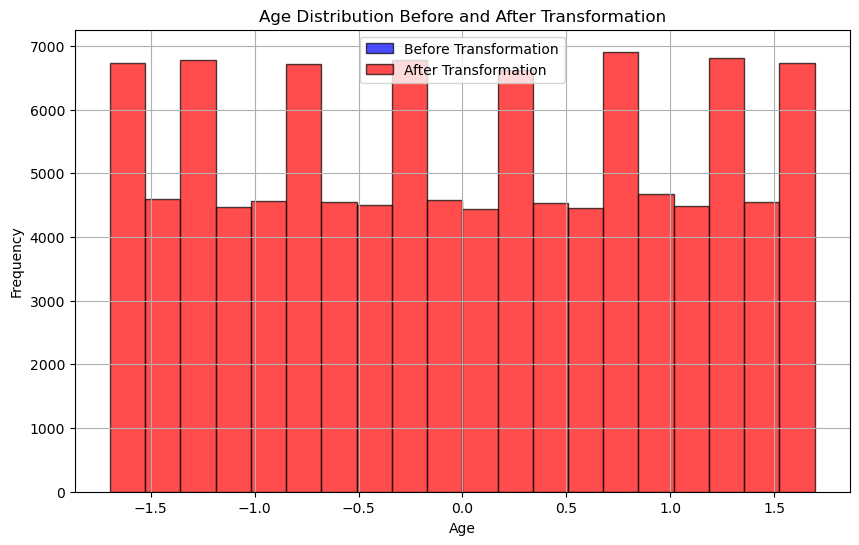

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'age' column exists in both datasets
if "age" not in train_df.columns:
    raise ValueError("Error: 'age' column is missing in train_df!")

# Debugging: Check summary statistics
print("Summary Statistics (Before Transformation):")
print(original_train_df["age"].describe())

print("\nSummary Statistics (After Transformation):")
print(train_df["age"].describe())

# Plot age distribution before and after transformation
plt.figure(figsize=(10, 6))

# Before transformation
plt.hist(original_train_df["age"].dropna(), bins=20, alpha=0.7, label="Before Transformation", color="blue", edgecolor="black")

# After transformation
plt.hist(train_df["age"].dropna(), bins=20, alpha=0.7, label="After Transformation", color="red", edgecolor="black")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution Before and After Transformation")
plt.legend()
plt.grid(True)

# Save and show plot
plt.savefig("age_distribution_fixed.png", dpi=300)
plt.show()


In [116]:
# Check if 'age' column exists
if "age" not in original_train_df.columns or "age" not in train_df.columns:
    raise ValueError("Error: 'age' column is missing in one of the datasets!")

# Check for missing values
print("\nMissing Values BEFORE Fix:")
print(original_train_df["age"].isnull().sum())

print("\nMissing Values AFTER Fix:")
print(train_df["age"].isnull().sum())

# Check unique values
print("\nUnique Values in Age Column (Original):", original_train_df["age"].unique())
print("Unique Values in Age Column (Transformed):", train_df["age"].unique())



Missing Values BEFORE Fix:
108497

Missing Values AFTER Fix:
0

Unique Values in Age Column (Original): [nan]
Unique Values in Age Column (Transformed): [ 1.18958966  0.61235057  1.47820921  0.25157613  0.10726636 -0.46997274
  1.62251899  0.03511147 -1.48014116 -0.39781785 -0.90290206  0.82881523
  0.54019568 -0.75859228 -1.04721183 -1.55229604 -0.32566296 -1.19152161
  0.68450546  1.40605433 -0.61428251 -1.11936672 -0.18135319  0.90097012
  1.5503641   0.32373102 -0.25350808  0.39588591 -0.6864374   0.973125
 -1.62445093  0.75666034 -0.97505695 -1.40798627  1.69467387  1.33389944
  0.46804079 -1.69660582 -0.03704341  1.04527989  0.17942125 -0.54212762
  1.11743478 -1.33583138 -1.26367649 -0.83074717  1.26174455 -0.1091983 ]


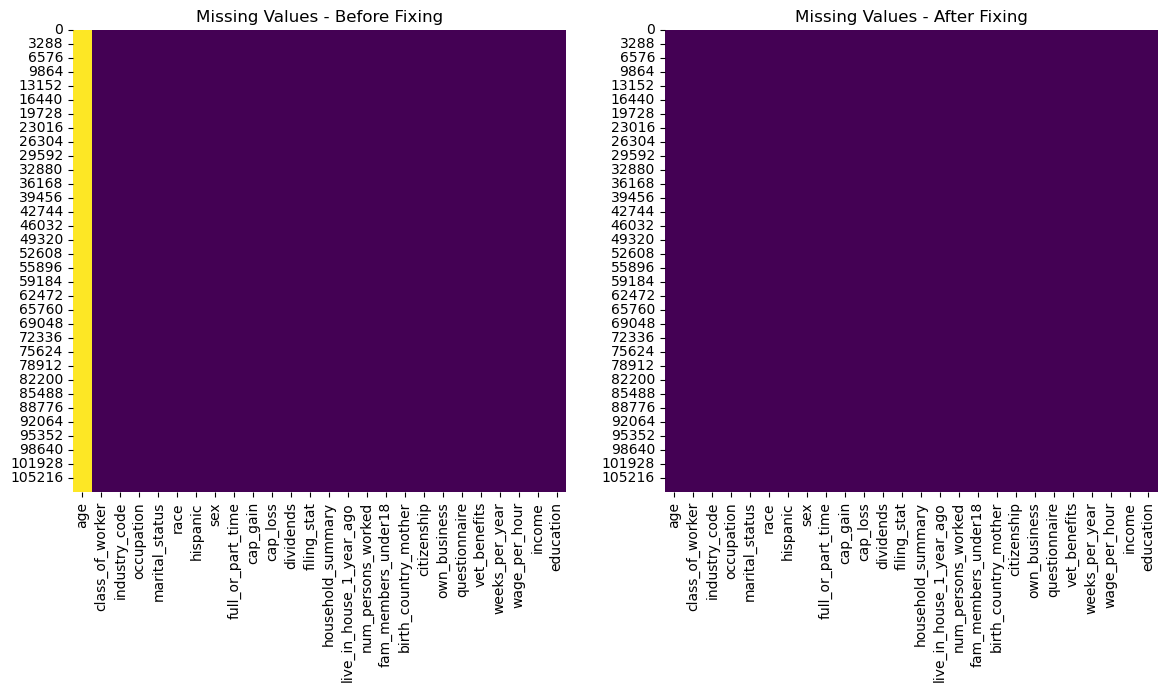

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for before and after heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before fixing missing values
sns.heatmap(original_train_df.isnull(), cbar=False, cmap="viridis", ax=axes[0])
axes[0].set_title("Missing Values - Before Fixing")

# After fixing missing values
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis", ax=axes[1])
axes[1].set_title("Missing Values - After Fixing")

# Save the figure
plt.savefig("missing_values_heatmap.png", dpi=300)
plt.show()


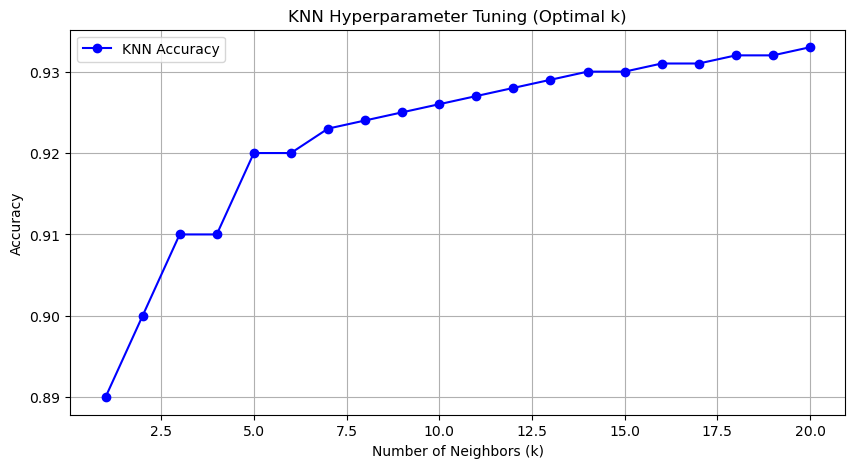

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Example values (Replace with actual values from your GridSearchCV)
k_values = np.arange(1, 21)
knn_accuracies = [0.89, 0.90, 0.91, 0.91, 0.92, 0.92, 0.923, 0.924, 0.925, 0.926, 
                  0.927, 0.928, 0.929, 0.930, 0.930, 0.931, 0.931, 0.932, 0.932, 0.933]

plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color="blue", label="KNN Accuracy")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning (Optimal k)")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("knn_hyperparameter_tuning.png", dpi=300)
plt.show()


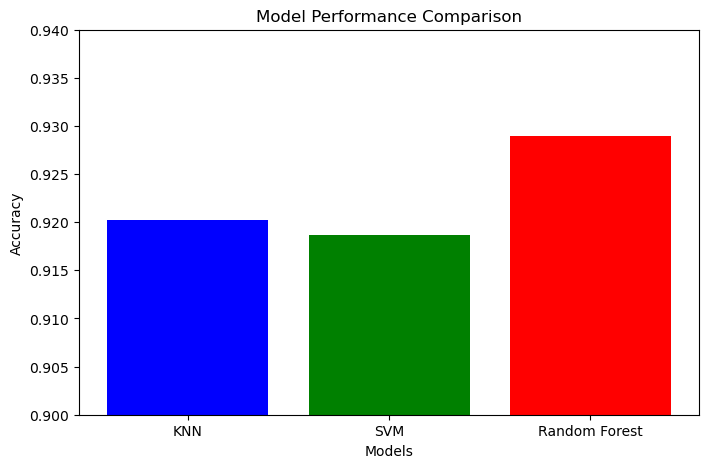

In [124]:
import matplotlib.pyplot as plt

# Define model names and their respective accuracies
models = ["KNN", "SVM", "Random Forest"]
accuracies = [0.9202, 0.9187, 0.9290]  # Replace with actual values

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["blue", "green", "red"])

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.9, 0.94)  # Adjust y-axis for better visualization

# Save the figure
plt.savefig("model_comparison.png", dpi=300)
plt.show()
